### SHAP Analysis

In [1]:
import shap
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
xgb.__version__

'1.0.0'

In [3]:
! ls ./data

client_data2.csv	 label_references.csv	      test_metrics.csv
client_data3.csv	 labels.csv		      test_results_all.csv
client_data.csv		 labels_validation.csv	      test_results.csv
clientes_input.csv	 models			      test_results_num2.csv
example_features.csv	 preds.csv		      test_results_num3.csv
example_input.csv	 test_metrics2.csv	      test_results_num.csv
example_labels.csv	 test_metrics3.csv	      Untitled.ipynb
features.csv		 test_metrics_all.csv
features_validation.csv  test_metrics_comparison.csv


In [4]:
model = XGBClassifier(learning_rate=0.1,n_estimators=100)
model.load_model("./data/models/xgb.model")

In [5]:
features = pd.read_csv('./data/features.csv')
clientes = pd.read_csv('./data/labels.csv') # 1 = Cancelado, 0 = Vigente

In [6]:
test_ids = set(clientes.idclientecrm.sample(frac = 0.15, random_state = 1))
features = features.set_index('idclientecrm')
clientes = clientes.set_index('idclientecrm')

In [7]:
clientes_test = clientes[clientes.index.isin(test_ids)].copy()

In [8]:
# train set
clientes_train = clientes[~clientes.index.isin(test_ids)]
features_train = features[~features.index.isin(test_ids)]

In [9]:
shap_values = shap.TreeExplainer(model).shap_values(features_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


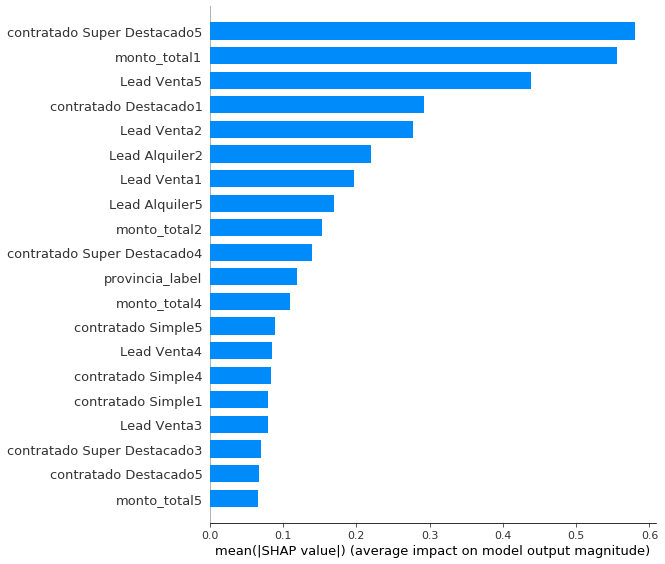

In [10]:
shap.summary_plot(shap_values, features_train, plot_type="bar")

In [11]:
features_monto = features_train.filter(['monto_total1', 'monto_total12', 'monto_total3', 'monto_total4', 'monto_total5'])

In [12]:
shap_values_1 = shap.TreeExplainer(model).shap_values(features_train)

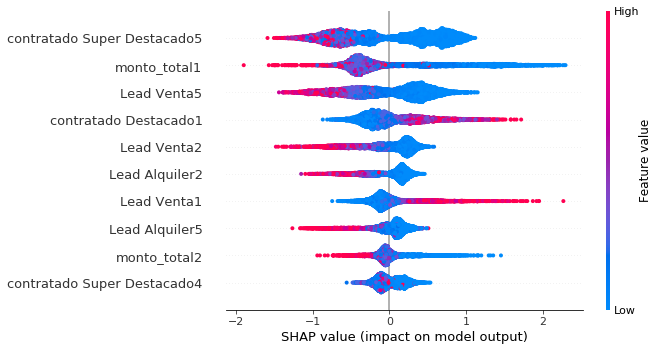

In [13]:
shap.summary_plot(shap_values, features_train, max_display = 10)

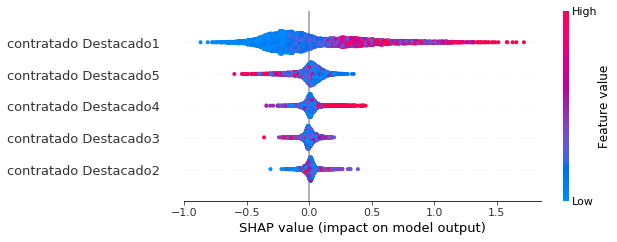

In [14]:
shap.summary_plot(shap_values[:,10:15], features_train.iloc[:,10:15], max_display = 10)

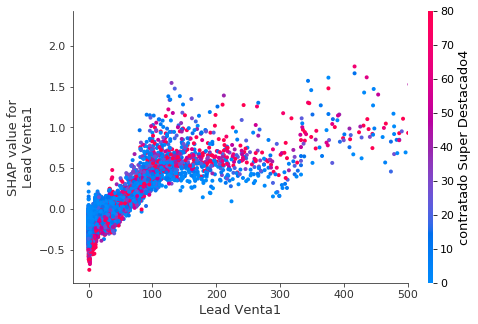

In [15]:
shap.dependence_plot('Lead Venta1', shap_values, features_train, xmax=500)

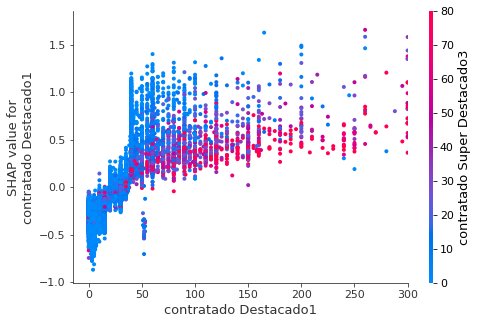

In [16]:
shap.dependence_plot('contratado Destacado1', shap_values, features_train, xmax=300)

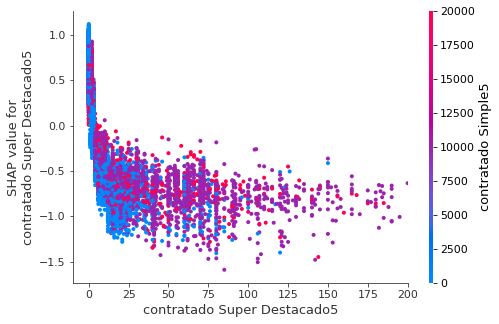

In [17]:
shap.dependence_plot('contratado Super Destacado5', shap_values, features_train, xmax=200)

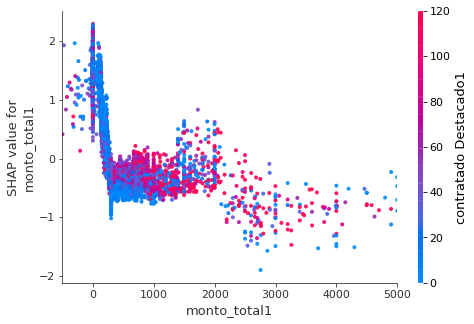

In [18]:
shap.dependence_plot('monto_total1', shap_values, features_train, xmin=-500, xmax=5000, alpha = 0.9)

In [19]:
##### Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, 
                        shap_values_Model[j], 
                        S.iloc[[j]], 
                        figsize = (20,5), 
                        text_rotation = 0, 
                        matplotlib = True)
    return(p)

In [20]:
features_test = features[features.index.isin(test_ids)]

In [21]:
S = pd.merge(features_test, clientes_test, left_index = True, right_index = True)
S

,monto_total1,monto_total2,monto_total3,monto_total4,monto_total5,contratado Super Destacado1,contratado Super Destacado2,contratado Super Destacado3,contratado Super Destacado4,contratado Super Destacado5,...,Lead Alquiler temporal1,Lead Alquiler temporal2,Lead Alquiler temporal3,Lead Alquiler temporal4,Lead Alquiler temporal5,provincia_label,Cliente Ilimitado sin Destaque,CLIENTE GRUPO_label,Integrador_label,Status Cliente
idclientecrm,,,,,,,,,,,,,,,,,,,,,
10400013,199.0,199.0,199.0,199.0,199.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5,0,2,0,0
10400022,565.0,565.0,565.0,565.0,565.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5,0,2,1,0
10400052,1275.0,1275.0,1275.0,1275.0,1275.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5,1,0,1,1
10400072,1999.0,1999.0,1999.0,1999.0,1999.0,30.0,30.0,30.0,30.0,30.0,...,0.0,0.0,0.0,0.0,0.0,5,0,1,0,0
10400107,577.0,577.0,577.0,577.0,577.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47292563,299.0,299.0,0.0,299.0,299.0,8.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25,0,2,1,1
47294059,239.0,239.0,239.0,239.0,239.0,13.0,6.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25,0,2,0,0
47294142,448.0,448.0,448.0,299.0,299.0,24.0,24.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25,0,2,1,0


In [22]:
S = features_test

In [23]:
feature_test =features_test.reset_index(drop=False)
feature_test[feature_test['idclientecrm']==47090117]

,idclientecrm,monto_total1,monto_total2,monto_total3,monto_total4,monto_total5,contratado Super Destacado1,contratado Super Destacado2,contratado Super Destacado3,contratado Super Destacado4,...,Lead Alquiler5,Lead Alquiler temporal1,Lead Alquiler temporal2,Lead Alquiler temporal3,Lead Alquiler temporal4,Lead Alquiler temporal5,provincia_label,Cliente Ilimitado sin Destaque,CLIENTE GRUPO_label,Integrador_label
883,47090117,0.0,0.0,0.0,0.0,0.0,26.0,26.0,26.0,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,25,0,2,0


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


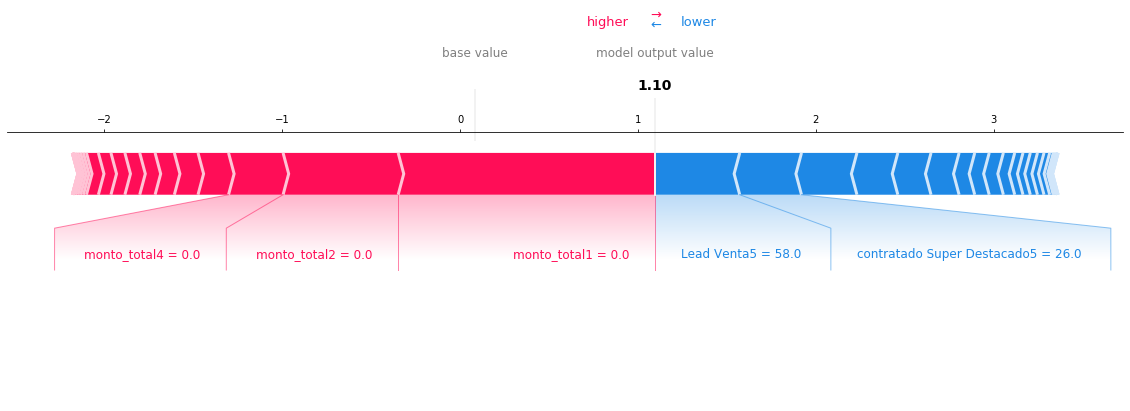

In [24]:
shap_plot(883)

In [28]:
import metrics_toolbox as mt

In [32]:
results = pd.read_csv('./data/test_results.csv', index_col = 'idclientecrm')

In [33]:
steps = [.05 * t for t in range(20)]

In [34]:
df = pd.DataFrame(steps)
df.columns = ['weight']

In [35]:
df['accuracy'] = df['weight'].apply(lambda x: mt.accuracy(results, filter = x))
df['recall'] = df['weight'].apply(lambda x: mt.recall(results, filter = x))
df['precision'] = df['weight'].apply(lambda x: mt.precision(results, filter = x))
df['subset relative size'] = df['weight'].apply(lambda x: mt.subset_relative_size(results, filter = x))

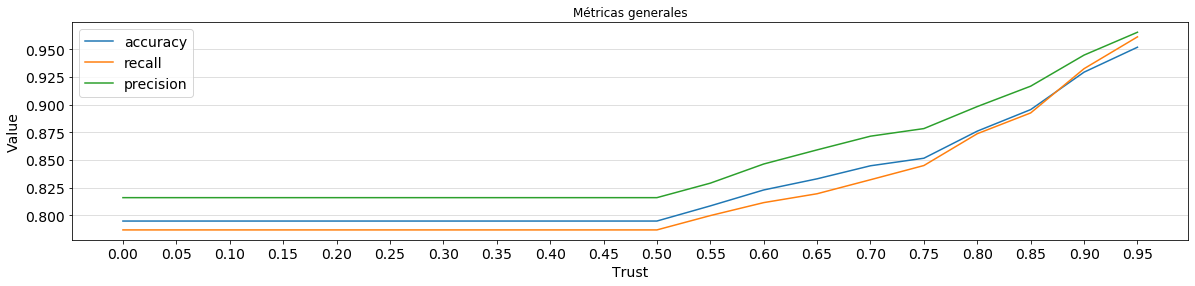

In [37]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots()
df.filter(['weight','accuracy', 'recall', 'precision']).plot(x = 'weight', 
                                                             figsize = (20,4), 
                                                             ax = ax2,
                                                             title = 'Métricas generales',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))
print("")

In [38]:
dfBig = pd.DataFrame(steps)
dfBig.columns = ['weight']

In [42]:
features_big = features[features['CLIENTE GRUPO_label']==0].reset_index(drop = False)

In [43]:
features_big

,idclientecrm,monto_total1,monto_total2,monto_total3,monto_total4,monto_total5,contratado Super Destacado1,contratado Super Destacado2,contratado Super Destacado3,contratado Super Destacado4,...,Lead Alquiler5,Lead Alquiler temporal1,Lead Alquiler temporal2,Lead Alquiler temporal3,Lead Alquiler temporal4,Lead Alquiler temporal5,provincia_label,Cliente Ilimitado sin Destaque,CLIENTE GRUPO_label,Integrador_label
0,10400010,1359.0,1359.0,1359.0,1349.0,1349.0,5.0,5.0,1.0,1.0,...,124.0,0.0,0.0,0.0,0.0,0.0,5,1,0,1
1,10400014,1499.0,1499.0,1499.0,1499.0,1499.0,1.0,1.0,1.0,1.0,...,654.0,0.0,0.0,0.0,0.0,0.0,5,1,0,1
2,10400015,3958.0,3958.0,1359.0,1359.0,1359.0,55.0,5.0,5.0,5.0,...,136.0,0.0,0.0,0.0,0.0,0.0,5,1,0,1
3,10400024,5149.0,5149.0,2899.0,2899.0,2899.0,25.0,25.0,25.0,25.0,...,840.0,0.0,0.0,0.0,0.0,0.0,5,1,0,1
4,10400028,1190.0,1190.0,1190.0,1190.0,1190.0,12.0,12.0,12.0,12.0,...,12.0,0.0,0.0,0.0,0.0,0.0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,47285461,1000.0,-3000.0,1000.0,5000.0,5000.0,40.0,40.0,280.0,380.0,...,810.0,298.0,286.0,179.0,185.0,399.0,0,0,0,1
756,47286611,599.0,1198.0,1797.0,1198.0,1198.0,203.0,203.0,153.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,0,0,0
757,47287213,849.0,849.0,849.0,1448.0,1448.0,20.0,20.0,20.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13,0,0,0
758,47288738,799.0,2096.0,1097.0,1097.0,598.0,329.0,129.0,129.0,29.0,...,58.0,0.0,0.0,0.0,0.0,0.0,25,0,0,1


In [44]:
results_big = results[results.index.isin(features_big.idclientecrm)]

In [45]:
len(results_big[results_big['correct']==True]) / len(results_big)

0.8333333333333334

In [46]:
dfBig = pd.DataFrame(steps)
dfBig.columns = ['weight']

In [47]:
dfBig['accuracy'] = dfBig['weight'].apply(lambda x: mt.accuracy(results_big, filter = x))
dfBig['recall'] = dfBig['weight'].apply(lambda x: mt.recall(results_big, filter = x))
dfBig['precision'] = dfBig['weight'].apply(lambda x: mt.precision(results_big, filter = x))
dfBig['subset relative size'] = dfBig['weight'].apply(lambda x: mt.subset_relative_size(results_big, filter = x))

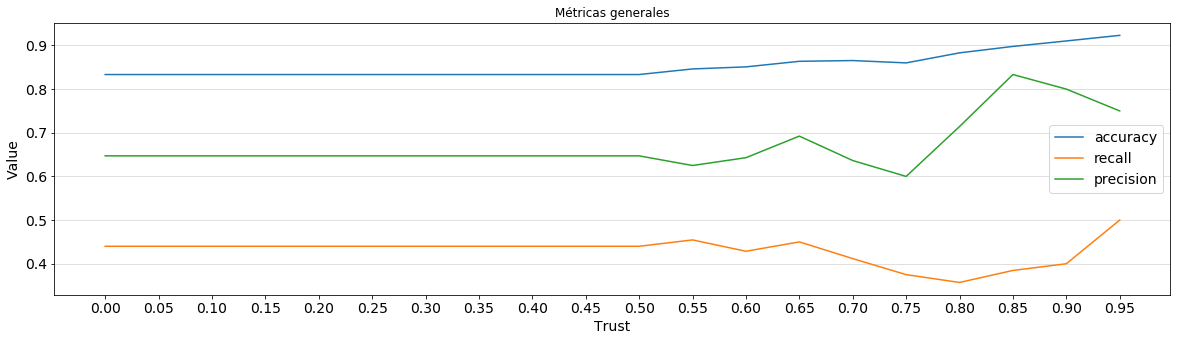

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots()
dfBig.filter(['weight','accuracy', 'recall', 'precision']).plot(x = 'weight', 
                                                             figsize = (20,5), 
                                                             ax = ax2,
                                                             title = 'Métricas generales',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))
print("")

In [49]:
len(results)

1706

In [50]:
df['subset size'] = len(results)*df['subset relative size']

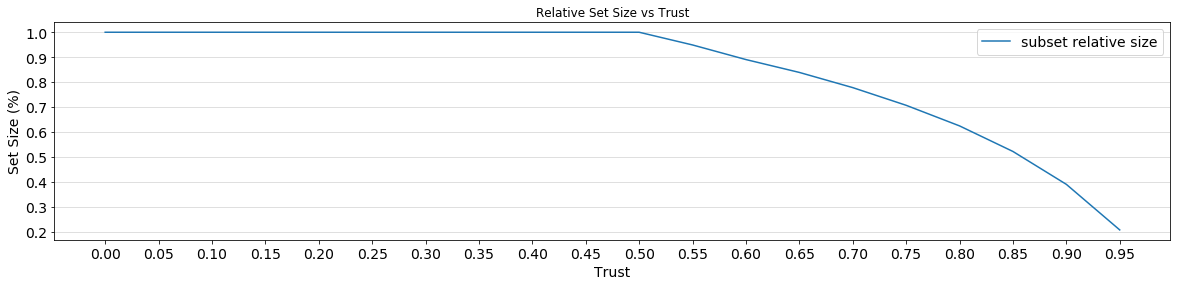

In [51]:
fig, ax2 = plt.subplots()
df.filter(['weight', 'subset relative size']).plot(x = 'weight', 
                                                             figsize = (20,4), 
                                                             ax = ax2,
                                                             title = 'Relative Set Size vs Trust',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Set Size (%)', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))
print("")

In [53]:
dfBig.head()

,weight,accuracy,recall,precision,subset relative size
0,0.00,0.833333,0.44,0.647059,1.0
1,0.05,0.833333,0.44,0.647059,1.0
2,0.10,0.833333,0.44,0.647059,1.0
3,0.15,0.833333,0.44,0.647059,1.0
4,0.20,0.833333,0.44,0.647059,1.0


In [55]:
print('Total: {}'.format(len(results_big)))
print('Cancelados: {}'.format(len(results_big[results_big['Status Cliente']==1])))
print('Cancelados no predichos (fn): {}'.format(mt.false_negatives(results_big)))
print('Cancelados predichos (tp): {}'.format(mt.true_positives(results_big)))

print('Recall: {}'.format(mt.recall(results_big)))
print('Precision: {}'.format(mt.precision(results_big)))

Total: 120
Cancelados: 25
Cancelados no predichos (fn): 14
Cancelados predichos (tp): 11
Recall: 0.44
Precision: 0.6470588235294118


In [56]:
df = results[results['weight']>.9]

In [57]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred = df['pred'], y_true = df['Status Cliente'])

In [58]:
import seaborn as sns
def plot_confussion_matrix(confusion, strategy = 'Random Forest Classifier'):
    plt.figure(figsize = (4,3))
    classes = ['Vigente', 'Cancelado']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 15},fmt="d")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    ax.set_yticklabels(classes, rotation=0)
    ax.set_xticklabels(classes, rotation=0)
    plt.title('Confusion Matrix for '+strategy, fontweight="bold")

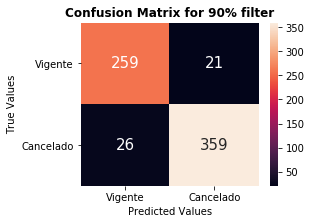

In [59]:
plot_confussion_matrix(confusion, strategy = "90% filter")